In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
!pwd

/home/matt/dsi_galvanize/capstones/spotify/notebooks


In [2]:
tracks = pd.read_csv('../../capstone1/spotify_data/tracks.csv')
artists = pd.read_csv('../../capstone1/spotify_data/artists.csv')

/home/matt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


''

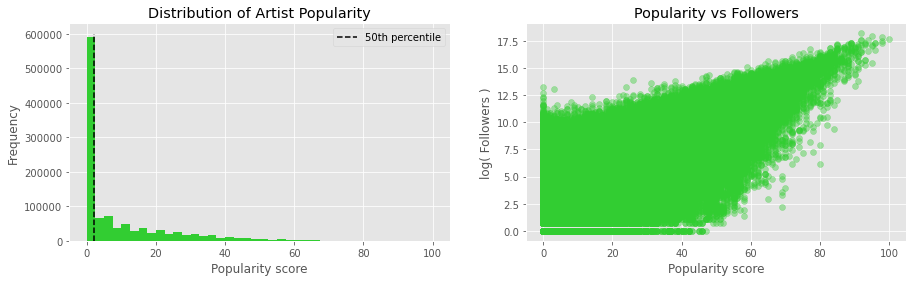

In [24]:
# Evaluate the popularity metric
fig, ax = plt.subplots(1,2, figsize=(15,4))

# Popularity distribution
ax[0].hist(artists['popularity'], bins=40, color='limegreen')
ax[0].vlines(artists['popularity'].quantile(0.5), 0, 600000, colors='black',linestyles='dashed', label='50th percentile')
ax[0].set_xlabel('Popularity score')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Artist Popularity')
ax[0].legend()

# Popularity vs followers
# followers = np.log(artists['followers'])
ax[1].scatter(artists['popularity'], np.log(artists['followers']), color='limegreen', alpha=0.4)
ax[1].set_xlabel('Popularity score')
ax[1].set_ylabel('log( Followers )')
ax[1].set_title('Popularity vs Followers')
plt.style.use('ggplot')
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/popularity_metric_hist_scat.png');
;

In [6]:
#Remove artists with no genre tags

genre_df = artists[artists['genres'] != '[]'].copy()
genre_df

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,['carnaval cadiz'],Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,['carnaval cadiz'],Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,['carnaval cadiz'],Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,['carnaval cadiz'],Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,"['classical harp', 'harp']",Vera Dulova,3
...,...,...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,90087.0,"['social media pop', 'teen pop']",Brent Rivera,33
1104331,4fh2BIKYPFvXFsQLhaeVJp,309.0,['la indie'],Lone Kodiak,20
1104334,7akMsd2vb4xowNTehv3gsY,774.0,['indie rockism'],The Str!ke,0
1104336,35m7AJrUCtHYHyIUhCzmgi,205.0,['indie rockism'],Hunter Fraser,6


In [9]:
genre_df.groupby('genres').count()

,id,followers,name,popularity
genres,,,,
"""australian children's music""",51,51,51,51
"""australian children's music"", ""children's folk"", ""children's music""",2,2,2,2
"""australian children's music"", ""children's music""",2,2,2,2
"""australian children's music"", ""children's music"", ""preschool children's music""",4,4,4,4
"""australian children's music"", ""preschool children's music""",2,2,2,2
...,...,...,...,...
'zouk riddim',66,66,66,66
'zouk',95,95,95,95
"'zouk', 'zouk riddim'",18,18,18,18


In [8]:
# Remove brackets from genre strings, then split by comma

genre_df['genres'] = genre_df.loc[:, 'genres'].str.strip("[]")
genre_split = genre_df.assign(genres=genre_df['genres'].str.split(', ')).explode('genres')
genre_split

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,'carnaval cadiz',Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,'carnaval cadiz',Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,'carnaval cadiz',Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,'carnaval cadiz',Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,'classical harp',Vera Dulova,3
...,...,...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,90087.0,'teen pop',Brent Rivera,33
1104331,4fh2BIKYPFvXFsQLhaeVJp,309.0,'la indie',Lone Kodiak,20
1104334,7akMsd2vb4xowNTehv3gsY,774.0,'indie rockism',The Str!ke,0
1104336,35m7AJrUCtHYHyIUhCzmgi,205.0,'indie rockism',Hunter Fraser,6


In [11]:
# Create a new dataframe for genre counts

genre_count = genre_split.groupby('genres').count().copy()
genre_count['genre_count'] = genre_count['id']
genre_count = genre_count.reset_index()
genre_count = genre_count[['genres', 'genre_count']]
genre_count.sort_values('genre_count', ascending=False)

,genres,genre_count
1216,'dance pop',572
3910,'pop',568
4262,'rock',564
1585,'electro house',558
1049,'classical performance',502
...,...,...
3367,'musica puntana',3
3377,'musica timor-leste',2
2208,'himene tarava',2
3075,'mazandarani folk',2


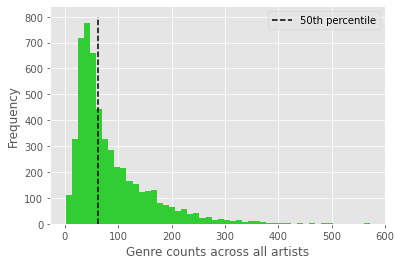

In [12]:
# How common are genres typically?

fig, ax = plt.subplots()
ax.hist(genre_count['genre_count'], bins=50, color='limegreen')
ax.set_xlabel('Genre counts across all artists')
ax.set_ylabel('Frequency')
plt.vlines(genre_count['genre_count'].quantile(0.5), 0, 800, colors='black',linestyles='dashed', label='50th percentile')
ax.legend()
plt.style.use('ggplot') 
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_count_histogram.png')

In [13]:
genre_count['genre_count'].max()

572

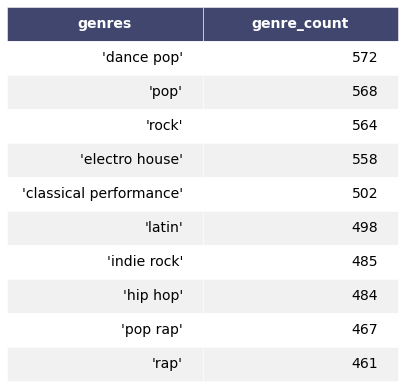

In [15]:
# What are the most popular genres?
top_10_genres = genre_count.sort_values('genre_count', ascending=False).head(10)

top_10_genres

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(top_10_genres, header_columns=0, col_width=3.5)
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/top_10_genres_table.png')

In [16]:
# How many times are the top 10% of genres observed?
genre_count['genre_count'].describe()

count    5365.000000
mean       85.898043
std        71.625160
min         1.000000
25%        38.000000
50%        61.000000
75%       113.000000
max       572.000000
Name: genre_count, dtype: float64

In [17]:
# What's the average popularity score associated with each genre?
genre_popularity = genre_split.groupby('genres').mean().copy()
genre_popularity = genre_popularity.reset_index()

genre_popularity_sum = genre_split.groupby('genres').sum().copy()
genre_popularity_sum = genre_popularity_sum.reset_index()
genre_popularity_sum['popularity_sum'] = genre_popularity_sum['popularity']



genre_count_popularity = pd.merge(genre_count, genre_popularity)

genre_metrics = pd.merge(genre_count_popularity, genre_popularity_sum.loc[:,['genres','popularity_sum']])
genre_metrics

,genres,genre_count,followers,popularity,popularity_sum
0,"""australian children's music""",68,5071.323529,25.735294,1750
1,"""black 'n' roll""",44,19659.590909,16.863636,742
2,"""british children's music""",71,2066.647887,16.774648,1191
3,"""canadian children's music""",51,2772.392157,15.039216,767
4,"""canzone d'autore""",69,85357.362319,26.231884,1810
...,...,...,...,...,...
5360,'zouglou',127,3918.582677,13.157480,1671
5361,'zouk riddim',153,10106.555556,26.274510,4020
5362,'zouk',168,6666.601190,23.666667,3976
5363,'zurich indie',38,3234.157895,10.210526,388


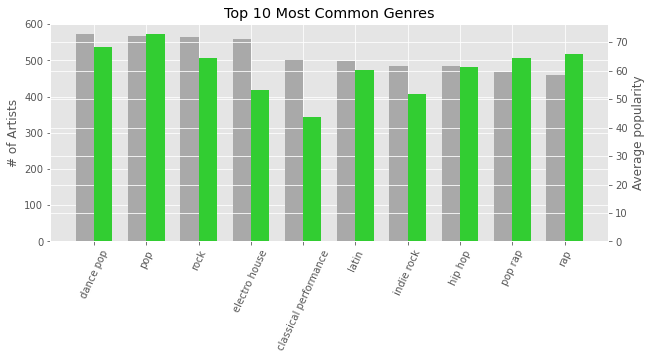

In [19]:
# How popular are the top 10 genres?

top_10_count_popularity = genre_count_popularity.sort_values('genre_count', ascending=False).head(10)

ind = np.arange(10)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,4))
ax2=ax.twinx()
rects1 = ax.bar(ind - width/2, top_10_count_popularity['genre_count'], width, color='darkgrey')
rects2 = ax2.bar(ind + width/2, top_10_count_popularity['popularity'], width, color='limegreen')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of Artists')
ax2.set_ylabel('Average popularity')
ax.set_title('Top 10 Most Common Genres')
ax.set_xticks(ind)
ax.set_xticklabels(top_10_count_popularity['genres'].str.strip("'"), rotation=65)
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/top_10_genres_count_and_pop_bar.png')

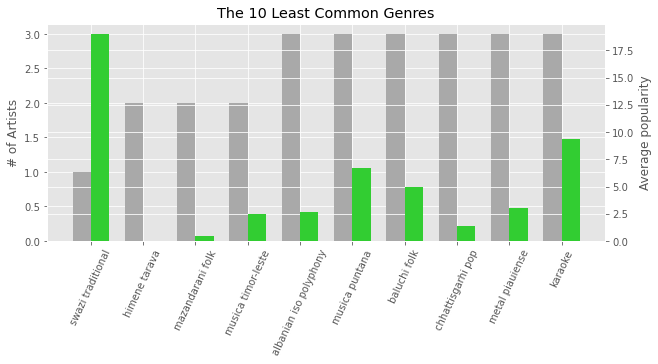

In [20]:
# How popular are the bottom 10 genres?

bottom_10_count_popularity = genre_count_popularity.sort_values('genre_count', ascending=True).head(10)


ind = np.arange(10)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,4))
ax2=ax.twinx()
rects1 = ax.bar(ind - width/2, bottom_10_count_popularity['genre_count'], width, color='darkgrey')
rects2 = ax2.bar(ind + width/2, bottom_10_count_popularity['popularity'], width, color='limegreen')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of Artists')
ax2.set_ylabel('Average popularity')
ax.set_title('The 10 Least Common Genres')
ax.set_xticks(ind)
ax.set_xticklabels(bottom_10_count_popularity['genres'].str.strip("'"), rotation=65)
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/bottom_10_genres_count_and_pop_bar.png')

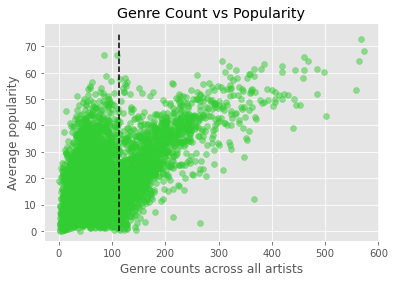

In [23]:
# Does genre count track with popularity?  

fig, ax = plt.subplots()
ax.scatter(genre_count_popularity['genre_count'], genre_count_popularity['popularity'], color='limegreen', alpha=0.5)
ax.vlines(genre_count['genre_count'].quantile(0.75), 0, 75, colors='black',linestyles='dashed', label='90th percentile')
ax.set_xlabel('Genre counts across all artists')
ax.set_ylabel('Average popularity')
ax.set_title('Genre Count vs Popularity')
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_count_popularity_scatter.png')

,genres,genre_count,followers,popularity,popularity_sum,demand
4730,'swazi traditional',1,78.000000,19.000000,19,19.000000
3069,'massage',4,1084.750000,23.750000,95,5.937500
2349,'indie hidalguense',4,2507.250000,20.500000,82,5.125000
3668,'oc rap',10,121062.700000,37.700000,377,3.770000
2457,'iowa hip hop',7,4204.142857,25.857143,181,3.693878
...,...,...,...,...,...,...
5232,'vintage western',115,17.800000,0.382609,44,0.003327
3449,'neo-proto',145,315.034483,0.393103,57,0.002711
5156,'uzbek traditional',41,9.268293,0.048780,2,0.001190
2208,'himene tarava',2,18.500000,0.000000,0,0.000000


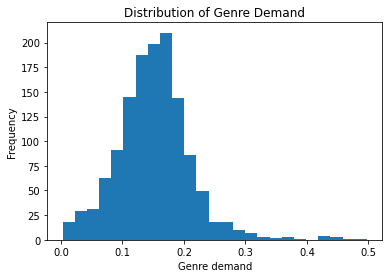

In [238]:
# Calculate a genre demand, as the ratio of genre_count to popularity
genre_metrics['demand'] = genre_metrics['popularity'] / genre_metrics['genre_count']
genre_metrics.sort_values('demand', ascending=False).head(50)

genre_metrics_clean = genre_metrics[(genre_metrics['popularity_sum'] != 0) & (genre_metrics['genre_count'] > 113)]
fig, ax = plt.subplots()
ax.hist(genre_metrics_clean['demand'], bins=25)
ax.set_xlabel('Genre demand')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Genre Demand')
;

# genre_metrics_clean.sort_values('demand', ascending=False)
genre_metrics.sort_values('demand', ascending=False)

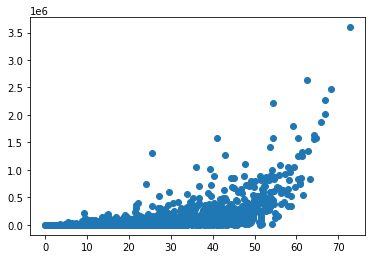

In [233]:
fig, ax = plt.subplots()
ax.scatter(genre_metrics['popularity'], genre_metrics['followers'])
# ax.set_xlim(0,10)
# ax.set_ylim(0,20)

In [260]:
genre_split[genre_split['name'] == "Bassnectar"]

,id,followers,genres,name,popularity
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'breakbeat',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'brostep',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'edm',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'electro house',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'electronic trap',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'glitch hop',Bassnectar,62


In [266]:
# Merge genre metrics with full artists dataframe

genre_metrics['popularity_avg'] = genre_metrics['popularity']
genre_artists = pd.merge(genre_split, genre_metrics[['genres', 'genre_count', 'popularity_avg', 'demand']])

99.4221459369026

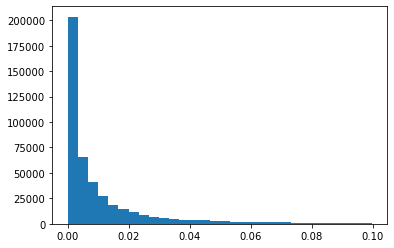

In [317]:
# Calculate "rising" metric, ratio of popularity to followers

genre_artists['rising'] = genre_artists['popularity'] / genre_artists['followers']
genre_artists_clean = genre_artists[(genre_artists['followers'] != 0) & (genre_artists['rising'] < 0.1)]

fig, ax = plt.subplots()
ax.hist(genre_artists_clean['rising'], bins=30)

genre_artists['demand'].quantile([0, 0.25, 0.5, 0.75, 0.95])

#inverse of quantile
stats.percentileofscore(genre_artists['demand'],1)

Miranda Lambert is in the top 0% of rising artists
Their 'country road' music is the most in-demand


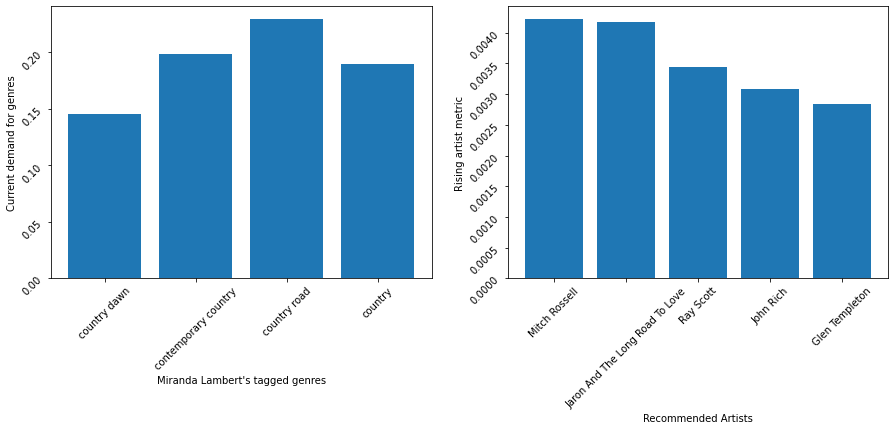

In [433]:
def genre_generator(artist,min_followers=10000):
    artist_profile = genre_artists[genre_artists['name'] == artist]
    demand = artist_profile.sort_values('demand', ascending=False)
    
    # find rising artists in the demand genre
    rising_demand = genre_artists[genre_artists['genres'] == (demand.iloc[0,2])].sort_values('rising', ascending=False)
    recs = rising_demand[rising_demand['followers'] > min_followers].head(5)

    # Plot artist genres
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].bar(artist_profile['genres'].str.strip("'"), artist_profile['demand'])
    ax[0].set_xlabel("{}'s tagged genres".format(artist))
    ax[0].set_ylabel('Current demand for genres')
    ax[0].tick_params(rotation=45)

    # Plot highest demand genre rising stars
    ax[1].bar(recs['name'], recs['rising'])
    ax[1].set_xlabel('Recommended Artists')
    ax[1].set_ylabel('Rising artist metric')
    ax[1].tick_params(rotation=45)

    # Calculate rising star
    star = stats.percentileofscore(genre_artists['demand'], artist_profile.iloc[0, 8]) * 100
    print('{} is in the top {}% of rising artists'.format(artist, round(star),2))
    print('Their {} music is the most in-demand'.format(demand.iloc[0,2]))



genre_generator('Miranda Lambert')

In [432]:
genre_artists[genre_artists['name'] == 'Miranda Lambert']

,id,followers,genres,name,popularity,genre_count,popularity_avg,demand,rising
43620,66lH4jAE7pqPlOlzUKbwA0,2694942.0,'country dawn',Miranda Lambert,75,185,26.951351,0.145683,0.000028
46359,66lH4jAE7pqPlOlzUKbwA0,2694942.0,'contemporary country',Miranda Lambert,75,283,56.250883,0.198766,0.000028
46934,66lH4jAE7pqPlOlzUKbwA0,2694942.0,'country road',Miranda Lambert,75,226,51.792035,0.229168,0.000028
123680,66lH4jAE7pqPlOlzUKbwA0,2694942.0,'country',Miranda Lambert,75,288,54.645833,0.189742,0.000028


In [280]:
genre_artists[genre_artists['genres'] == "'austin americana'"].sort_values('rising', ascending=False).head(20)

,id,followers,genres,name,popularity,genre_count,popularity_avg,demand,rising
428991,1CSlVKKjwJ7h1yJSaLGLlz,25.0,'austin americana',John McDonough,26,41,21.195122,0.516954,1.040000
428988,1BsemFYB6Jnvzo2BQG2ntM,42.0,'austin americana',Marshall Anderson,2,41,21.195122,0.516954,0.047619
428977,2Ilw96AgJxhArKIpy3b1oY,128.0,'austin americana',Roxi Copland,6,41,21.195122,0.516954,0.046875
428980,7vHXZwdro0E7c2yswVVxpL,444.0,'austin americana',The Watters,12,41,21.195122,0.516954,0.027027
428969,0UFONazWMWbXd0Nlo2qEB1,252.0,'austin americana',Altamesa,6,41,21.195122,0.516954,0.023810
428968,6fELzqFudMVFmHRHnpaRDq,524.0,'austin americana',Percy Falls,12,41,21.195122,0.516954,0.022901
428971,1GaG01XcL520Q1SvovfbQC,752.0,'austin americana',Uncle Walt's Band,17,41,21.195122,0.516954,0.022606
428967,2TZOO6t9Bsn8KCPH8RXnlY,53.0,'austin americana',Ricky Stein,1,41,21.195122,0.516954,0.018868
428984,651GwyFbKSM1PRbRqFC2en,583.0,'austin americana',Ali Holder,11,41,21.195122,0.516954,0.018868
428997,1fvc00ooUl0WtqDzl1RR3b,1113.0,'austin americana',Jeff Plankenhorn,19,41,21.195122,0.516954,0.017071
